<a href="https://colab.research.google.com/github/danyamrajuSanjay/Machine_Learning/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import numpy as np

fashion mnist with DNN

In [3]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images / 255.0
test_images=test_images / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

test_loss = model.evaluate(test_images, test_labels)

4423680/4422102 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4974 - accuracy: 0.8255
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3733 - accuracy: 0.8659
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3371 - accuracy: 0.8774
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3111 - accuracy: 0.8854
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.3640 - accuracy: 0.8683


fashion mnist with CNN, adding one to showcase that the color is grayscaled, else 3 for RGB

import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images.reshape(60000, 28, 28, 1)

In [7]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
test_images=test_images.reshape(10000, 28, 28, 1)

In [14]:
training_images=training_images / 255.0
test_images=test_images / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
model.summary()
test_loss = model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 82s 44ms/step - loss: 1.0934 - accuracy: 0.5854
Epoch 2/5
1875/1875 [==============================] - 81s 43ms/step - loss: 0.7365 - accuracy: 0.7266
Epoch 3/5
1875/1875 [==============================] - 80s 43ms/step - loss: 0.6584 - accuracy: 0.7543
Epoch 4/5
1875/1875 [==============================] - 80s 43ms/step - loss: 0.6226 - accuracy: 0.7686
Epoch 5/5
1875/1875 [==============================] - 81s 43ms/step - loss: 0.5944 - accuracy: 0.7803
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        36928     
_

In [13]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


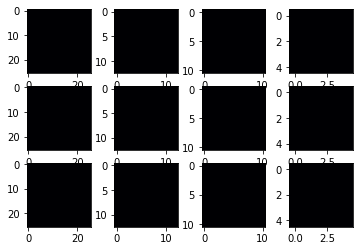

In [25]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=4
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 5
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

Adding 32 filters instead 64 dampens the accuracy

In [28]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
model.summary()
test_loss = model.evaluate(test_images, test_labels)

2.3.0
11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1473 - accuracy: 0.9560
Epoch 2/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0515 - accuracy: 0.9845
Epoch 3/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0334 - accuracy: 0.9897
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0215 - accuracy: 0.9933
Epoch 5/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0157 - accuracy: 0.9949
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0116 - accuracy: 0.9962
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0075 - accuracy: 0.9976
Epoch 8/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0072 - accuracy: 0.9976
Epoch 9/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0050 - accuracy: 